In [525]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreadsbooks/books.csv


In [526]:
try:
    data = pd.read_csv("/kaggle/input/goodreadsbooks/books.csv", on_bad_lines='skip')
except pd.errors.ParserError:
    pass
data

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [527]:
original_df = data
print("Original data shape :", original_df.shape)

Original data shape : (11123, 12)


In [528]:
# Total number of records in original dataframe
print("Total number of records in original dataframe :", len(data))

Total number of records in original dataframe : 11123


In [529]:
# All Columns 
list(data.columns)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 '  num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

In [530]:
# Replace spaces with nothing 
data.columns = data.columns.str.replace(' ', '')
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

****Data Overview and Basic Statistics:****

In [531]:

# What is the total number of books in the dataset?
len(data)

11123

In [532]:
# How many unique authors are there?
len(data["authors"].unique())

6639

In [533]:

# What is the average book rating in the dataset?
data["average_rating"].mean()


3.9340753393868564

In [534]:

# What is the range of publication dates in the dataset?
date_formats = '%m/%d/%Y'  #12/1/1988
data['publication_date'] = pd.to_datetime(data['publication_date'], format=date_formats, errors='coerce') 
print("Earliest date of publication :",data['publication_date'].min().date())
print("Latest date of publication ",data['publication_date'].max().date())


Earliest date of publication : 1900-01-01
Latest date of publication  2020-03-31


In [535]:
# Which book has the highest average rating?
data[data["average_rating"] == data["average_rating"].max()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,Oxford University Press USA
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9783829602266,eng,83,1,0,2006-09-01,Schirmer Mosel
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,0439271711,9780439271714,eng,32,4,1,2002-01-01,Teaching Resources
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9780738511672,eng,128,2,0,2003-03-17,Arcadia Publishing
4125,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,0744002354,9780744002355,eng,128,2,0,2003-03-06,BradyGames
4788,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,Square One Publishers
4933,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,Vantage Press
5023,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,0851621813,9780851621814,eng,96,1,0,2004-06-01,Boosey & Hawkes Inc
5474,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,0563388692,9780563388692,eng,2,3,0,1996-04-01,BBC Physical Audio
5476,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,0563388323,9780563388326,eng,2,2,0,1995-10-02,BBC Physical Audio


In [536]:
# What is the most common language in which books are written?
data["language_code"].value_counts().reset_index().head()

,language_code,count
0,eng,8908
1,en-US,1408
2,spa,218
3,en-GB,214
4,fre,144


In [537]:
# How many books have more than 1000 pages?
len(data[data["num_pages"] > 1000])

217

In [538]:
# What is the average number of text reviews per book?

print(data["text_reviews_count"].mean())

542.048098534568


In [539]:

# What is the median number of pages for books published by each publisher?
data.head()
data.groupby("publisher")["num_pages"].median().reset_index()

,publisher,num_pages
0,10/18,364.0
1,1st Book Library,600.0
2,1st World Library,387.0
3,A & C Black (Childrens books),62.0
4,A Harvest Book/Harcourt Inc.,216.0
...,...,...
2285,聯經出版事業股份有限公司,537.5
2286,英文漢聲出版股份有限公司,36.0
2287,角川書店 (Kadokawa Shoten),171.5
2288,講談社,186.5


In [540]:

# How many books have both ISBN and ISBN13 values?
print("Total Books :", len(data))
print("Total number of books with ISBN and ISBN13 values :",len(data[(data["isbn"].notnull()) & (data["isbn13"].notnull())]))

Total Books : 11123
Total number of books with ISBN and ISBN13 values : 11123


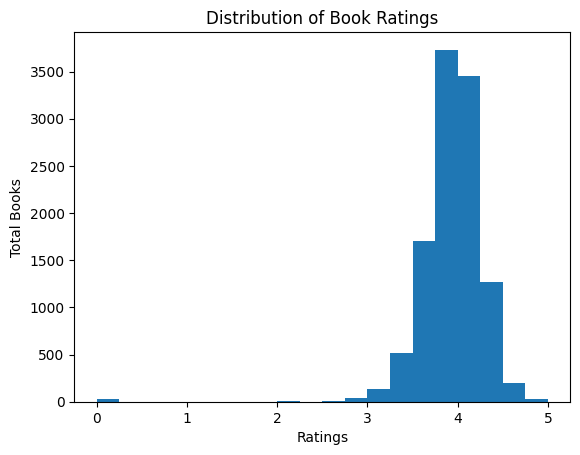

In [541]:

# What is the distribution of average ratings using a histogram?
import matplotlib.pyplot as plt

# Create a histogram with 20 bins
plt.hist(data["average_rating"], bins=20)

# Set the x-axis and y-axis labels
plt.xlabel("Ratings")
plt.ylabel("Total Books")

# Add a title to the plot
plt.title("Distribution of Book Ratings")

# Show the plot
plt.show()


In [542]:
filtered_data = data[(data["average_rating"] >= 0) & (data["average_rating"] <= 1)]
print("Total books which have ratings in between 0 and 1 :",len(filtered_data))

Total books which have ratings in between 0 and 1 : 27


****Author Analysis:****

In [543]:
#  Expanding the dataframes with single author in author column

data['authors'] = data['authors'].str.split('/')
data = data.explode('authors')
print("Total number of records in new dataframe :",len(data))

Total number of records in new dataframe : 19237


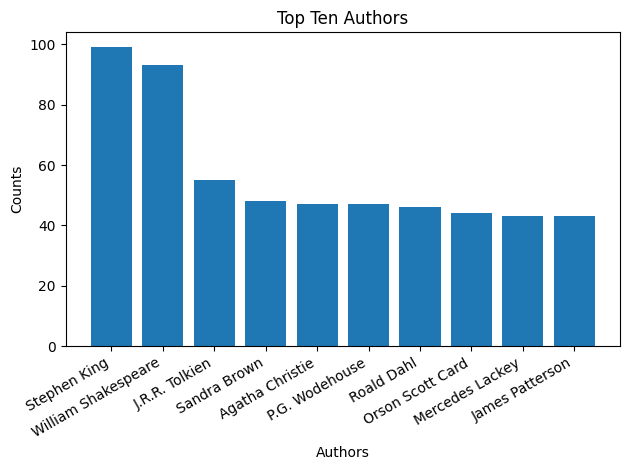

In [544]:
# Who are the top 10 authors with the most books in the dataset?


import matplotlib.pyplot as plt

top_ten_authors = data["authors"].value_counts().head(10)
plt.bar(top_ten_authors.index, top_ten_authors.values)

plt.xlabel('Authors')
plt.ylabel('Counts')
plt.title('Top Ten Authors')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

plt.tight_layout()  # Adjusts the layout to prevent label cutoff
plt.show()



In [545]:
# Changing dataframe for Authors analysis

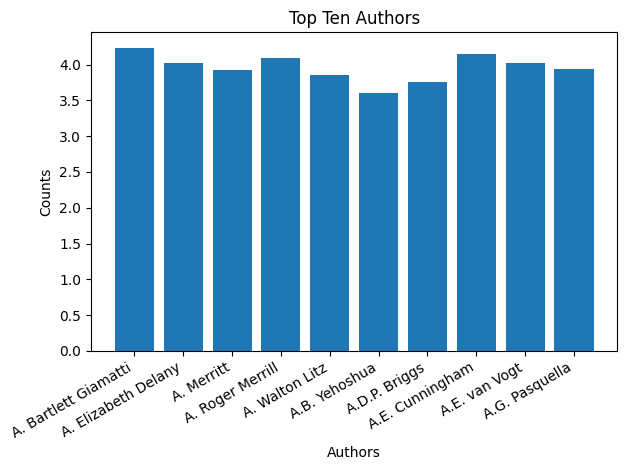

In [546]:


# Calculate the average rating for books written by each author



average_ratings = data.groupby("authors")["average_rating"].mean().reset_index().head(10)
plt.bar(average_ratings["authors"], average_ratings["average_rating"])

plt.xlabel('Authors')
plt.ylabel('Counts')
plt.title('Top Ten Authors')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

plt.tight_layout()  # Adjusts the layout to prevent label cutoff
plt.show()


In [547]:
# What is the most common language for books written by each author?
# from tqdm import tqdm
# all_authors = sorted(list(data["authors"].unique()))

# updated_data = pd.DataFrame()
# for author in tqdm(all_authors):
#     author_data = data[data["authors"] == author]
#     lang_data = author_data["language_code"].value_counts().reset_index()
#     lang_data["author"] = author
#     lang_data = lang_data[["author","language_code","count"]]
#     updated_data = pd.concat([updated_data, lang_data], ignore_index=True)
    
    
# df = pd.DataFrame(updated_data)
# df



In [548]:

# Are there any authors who write books in multiple languages?

author_language_counts = df.groupby('author')['language_code'].nunique()

# Filter for authors with more than one unique language code
authors_with_multiple_languages = author_language_counts[author_language_counts > 1].index

print(authors_with_multiple_languages)

Index(['Adam Gopnik', 'Aeschylus', 'Agatha Christie', 'Al Franken', 'Al Ries',
       'Alain de Botton', 'Alan  Lee', 'Alan Dean Foster', 'Alan R. Clarke',
       'Albert Camus',
       ...
       'Yayoi Ogawa', 'Yoshitaka Amano', 'Yuki Shimizu', 'Yukito Kishiro',
       'Yumi Hotta', 'Zadie Smith', 'Zora Neale Hurston', 'Åsne Seierstad',
       'Émile Zola', '大暮 維人'],
      dtype='object', name='author', length=1075)


****Publication Analysis****

In [549]:
data = original_df
data.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                         int64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

In [550]:
data.shape

(11123, 12)

In [551]:
# Which publisher has the most books in the dataset?

data["publisher"].value_counts().reset_index().head(5)

,publisher,count
0,Vintage,318
1,Penguin Books,261
2,Penguin Classics,184
3,Mariner Books,150
4,Ballantine Books,144


In [552]:
# What is the average rating for books published by each publisher?
data.groupby("publisher")["average_rating"].mean().reset_index().head(10)

,publisher,average_rating
0,10/18,3.650
1,1st Book Library,3.580
2,1st World Library,4.180
3,A & C Black (Childrens books),4.400
4,A Harvest Book/Harcourt Inc.,4.070
5,A K PETERS,4.500
6,AA World Services,4.450
7,ACE,3.560
8,ADV Manga,4.038
9,AHA! Process,3.900


In [553]:
# Adding year published column


# Assuming "data" is your DataFrame
data["year_published"] = data["publication_date"].dt.year


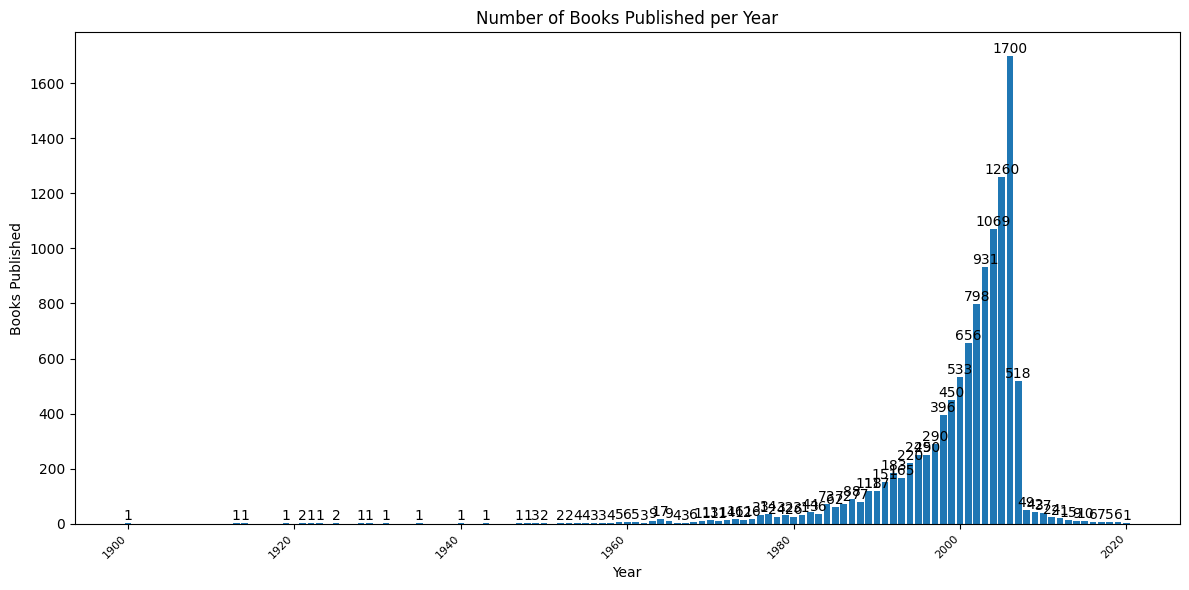

In [554]:
import matplotlib.pyplot as plt

# Assuming data["year_published"] contains the years you want to count
year_counts = data["year_published"].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # Adjust the figure size

bar_plot = plt.bar(year_counts.index, year_counts.values)

plt.xlabel('Year')
plt.ylabel('Books Published')
plt.title('Number of Books Published per Year')

# Rotate the x-axis labels for better readability and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=8)

# Add labels to the bars for clarity
for x, y in zip(year_counts.index, year_counts.values):
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom')

plt.tight_layout()  # Adjusts the layout to prevent label cutoff
plt.show()


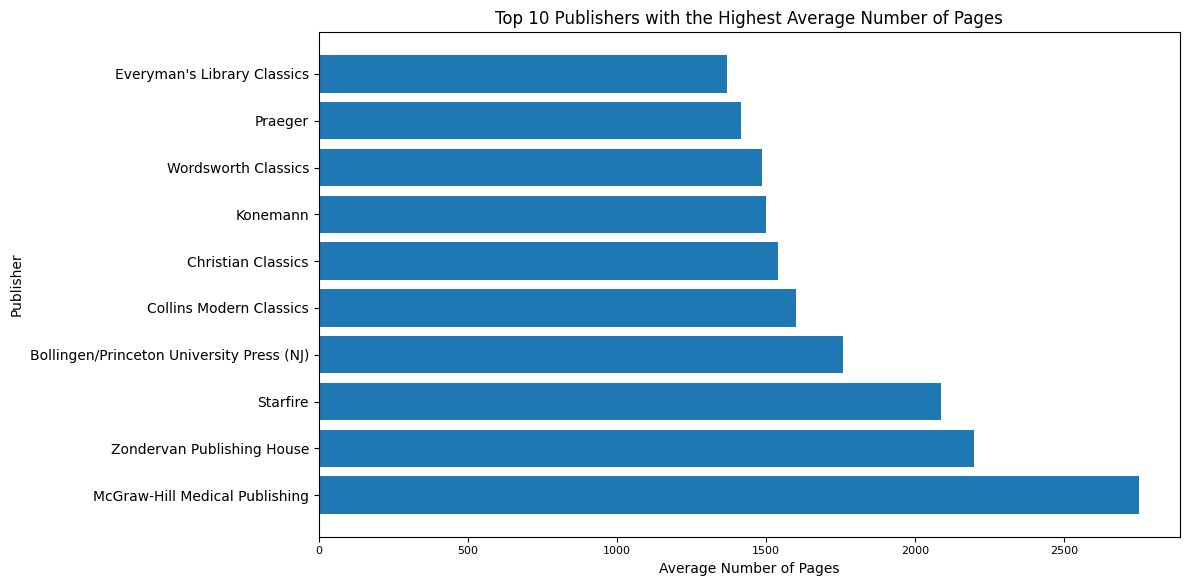

In [555]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Assuming data["num_pages"] contains the number of pages and data["publisher"] contains the publisher information
publisher_page_counts = data.groupby("publisher")["num_pages"].mean().reset_index()
top_10_publishers = publisher_page_counts.sort_values(by="num_pages", ascending=False).head(10)

plt.figure(figsize=(12, 6))  # Adjust the figure size

# Create a horizontal bar plot by using plt.barh
bar_plot = plt.barh(top_10_publishers["publisher"], top_10_publishers["num_pages"])

plt.xlabel('Average Number of Pages')  # Set the x-axis label to 'Average Number of Pages'
plt.ylabel('Publisher')  # Set the y-axis label to 'Publisher'
plt.title('Top 10 Publishers with the Highest Average Number of Pages')

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Resolve the font warning
font_prop = FontProperties(family="DejaVu Sans", style="normal", size=8)
plt.xticks(fontproperties=font_prop)

plt.show()


In [556]:
data[data["publisher"] == "McGraw-Hill Medical Publishing"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year_published
7862,30258,Harrison's Principles of Internal Medicine,"[Dennis L. Kasper, Dan L. Longo, Stephen L. Ha...",4.35,0071391401,9780071391405,eng,2751,23,4,2004-07-27,McGraw-Hill Medical Publishing,2004.0


****Time Series Analysis:****

In [557]:
# Is there a seasonal pattern in book publication over the years?
# Are there any trends in average ratings over time?
# What is the distribution of books by month of publication?
# How has the number of text reviews changed over the years?

**Correlations and Relationships:**

In [558]:
# Is there a correlation between the number of ratings and the average rating?
# Do books with more pages tend to have higher average ratings?
# Is there a relationship between the number of text reviews and the number of ratings?
# Are books in a certain language more likely to have a high average rating?
# Do certain publishers have a preference for specific authors?

****Advanced Visualizations****

In [559]:
# Create a heat map showing the correlations between numerical columns.
# Visualize the distribution of average ratings for different languages using a violin plot.
# Plot a scatter plot of the number of text reviews vs. ratings for each book.
# Create a stacked bar chart showing the number of books published by the top 10 authors each year.
# Generate a time series plot of the average rating over the years for a specific author.

**Geospatial Analysis:**

In [560]:
# Can you visualize the distribution of books by author's home country on a map?
# Are there any geographic clusters of popular authors or publishers?

**NLP and Text Analysis:**

In [561]:
# Analyze book titles to identify common keywords or themes.
# Perform sentiment analysis on text reviews to identify positive and negative sentiments.
# Create a word cloud from book titles or authors' names.

****

**Machine Learning and Predictive Analysis:**

In [562]:

# Can you build a model to predict a book's average rating based on its features?
# What features are the most important predictors of a high average rating?
# Are there any trends in book popularity (ratings_count) that can be predicted over time?
# Can you predict the language of a book based on its title or author's name?

**Recommendation Systems:**

In [563]:
# Can you create a simple book recommendation system based on user reviews?
# Implement collaborative filtering to suggest books based on user preferences.
# Use content-based filtering to suggest books based on book features (e.g., author, language, publisher).

**Outlier Detection:**

In [564]:
# Identify books that are outliers in terms of ratings, reviews, or other features.
# Explore the reasons for outliers, such as unusually high ratings with few reviews.

**Data Cleaning and Preprocessing:**

In [565]:


# Are there any missing values in the dataset, and how should they be handled?
# Are there any duplicated rows in the dataset that need to be removed?